###*Sayantan Mukherjee 60009220131 D2-2*

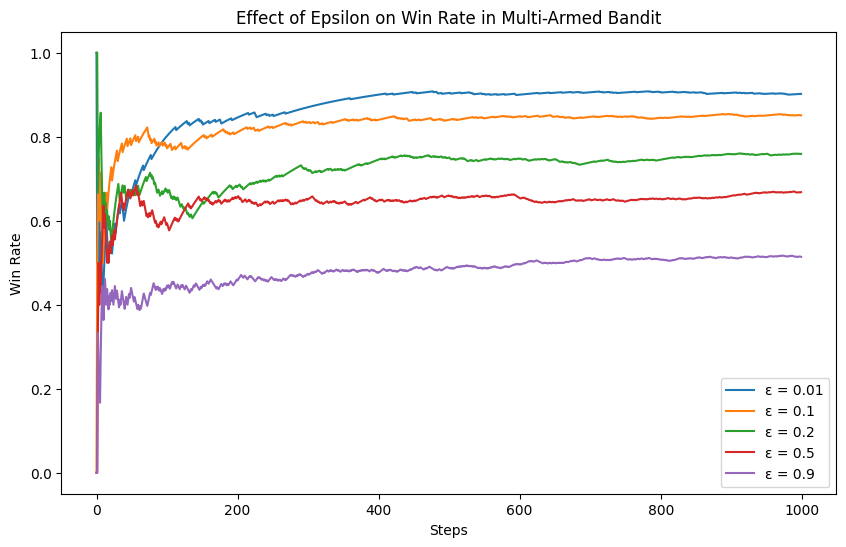

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class MultiArmedBandit:
    def __init__(self, k):
        self.k = k
        self.true_win_rates = np.random.rand(k)
        self.estimated_win_rates = np.zeros(k)
        self.action_counts = np.zeros(k)

    def pull_arm(self, arm):
        """Simulates pulling an arm; returns 1 for a win and 0 for a loss."""
        return 1 if np.random.rand() < self.true_win_rates[arm] else 0

    def select_arm(self, epsilon):
        """Selects an arm using the epsilon-greedy strategy."""
        if np.random.rand() < epsilon:
            return np.random.randint(self.k)  #explore
        else:
            return np.argmax(self.estimated_win_rates)    #exploit

    def update_estimates(self, arm, reward):
        """Updates the estimated win rate of the selected arm."""
        self.action_counts[arm] += 1
        self.estimated_win_rates[arm] += (reward - self.estimated_win_rates[arm]) / self.action_counts[arm]

    def run(self, epsilon, steps):
        """Runs the bandit simulation for a given epsilon over a number of steps."""
        total_wins = 0
        win_rates = []
        for _ in range(steps):
            arm = self.select_arm(epsilon)
            reward = self.pull_arm(arm)
            self.update_estimates(arm, reward)
            total_wins += reward
            win_rates.append(total_wins / (_ + 1))
        return win_rates

epsilons = [0.01, 0.1, 0.2, 0.5, 0.9]
steps = 1000

plt.figure(figsize=(10, 6))
for epsilon in epsilons:
    bandit = MultiArmedBandit(k=10)
    win_rates = bandit.run(epsilon, steps)
    plt.plot(win_rates, label=f"ε = {epsilon}")

plt.xlabel("Steps")
plt.ylabel("Win Rate")
plt.title("Effect of Epsilon on Win Rate in Multi-Armed Bandit")
plt.legend()
plt.show()


#N Arm Bandit


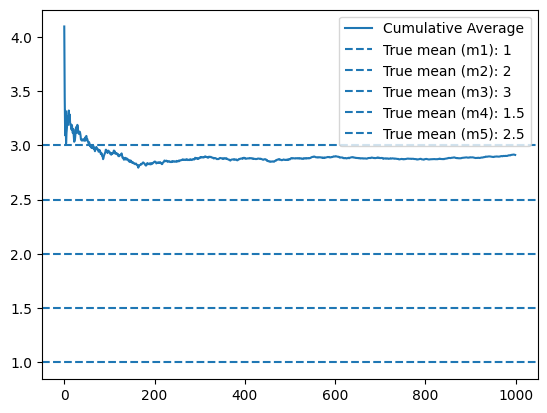

No of times explored:  110
No of times exploited:  890
Mean of rewards from arm 1: 1.0339767230765335
Mean of rewards from arm 2: 2.003396786866289
Mean of rewards from arm 3: 3.029681631801047
Mean of rewards from arm 4: 1.4970160122942302
Mean of rewards from arm 5: 2.166060722703289


In [ ]:
class Action:
    def __init__(self, mean):
        self.mean = mean
        self.q = 0  # Estimated value of the action
        self.count = 0  # How many times this action has been selected

    def select(self):
        return np.random.normal(self.mean, 1)

    def update(self, reward, alpha):
        self.count += 1
        self.q += (reward - self.q) / self.count  # Incremental mean formula

def n_arm_bandit_epsilon_greedy(true_means, eps, N):
    actions = [Action(mean) for mean in true_means]
    data = np.empty(N)
    explore, exploit = 0, 0
    for i in range(N):
        p = np.random.random()

        # Exploration (select a random action)
        if p < eps:
            j = np.random.choice(len(true_means))
            explore += 1
        else:
            # Exploitation (select the best-known action)
            j = np.argmax([a.q for a in actions])
            exploit += 1

        # Get the reward from the selected action and update its value
        x = actions[j].select()
        actions[j].update(x, 0.1)

        # Store the reward for calculating the cumulative average
        data[i] = x

    # Calculate cumulative average of the rewards
    cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

    # Plot the cumulative average and true means
    plt.plot(cumulative_average, label="Cumulative Average")
    for i, mean in enumerate(true_means):
        plt.axhline(y=mean, linestyle='--', label=f"True mean (m{i+1}): {mean}")
    plt.legend()
    plt.show()

    # Output the exploration vs exploitation counts and action means
    print("No of times explored: ", explore)
    print("No of times exploited: ", exploit)
    for i in range(len(actions)):
        print(f"Mean of rewards from arm {i+1}: {actions[i].q}")

    return cumulative_average

# Example usage
true_means = [1, 2, 3, 1.5, 2.5]  # True means for N arms (can be any number of arms)
eps = 0.1  # Epsilon (probability of exploration)
N = 1000  # Number of steps

cumulative_average = n_arm_bandit_epsilon_greedy(true_means, eps, N)


Conclusion:
Low epsilon values tend to result in faster convergence and higher win rates, but they may miss out on potentially better arms due to insufficient exploration.

High epsilon values promote thorough exploration but lead to slower convergence as the agent spends more time testing suboptimal arms.

Medium epsilon values offer a balanced approach, with gradual convergence and a good mix of exploration and exploitation.

Choosing the right epsilon is crucial for the performance of the epsilon-greedy strategy. For environments where arms have significantly different win rates, tuning epsilon can help find the best balance between exploration and exploitation, maximizing long-term rewards.